In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro


import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson


# 캘리포니아 주택 데이터셋 로드
#california = fetch_california_housing()
#data = pd.DataFrame(california.data, columns=california.feature_names)
#data['MedHouseVal'] = california.target

# 필요한 컬럼 선택
#X = data['MedInc']
#y = data['MedHouseVal']

# 상수항 추가
#X = sm.add_constant(X)

In [2]:
# 데이터 포인트 수
n_points = 100

# 임의의 데이터 생성
np.random.seed(42)
x = np.random.rand(n_points, 1) * 10
true_slope = 2
true_intercept = 5
noise = np.random.randn(n_points, 1)
y = true_slope * x + true_intercept + noise

In [3]:
# 선형대수 사용한 최소제곱의 해 
# 1을 추가하여 상수항 처리
A = np.hstack([x, np.ones((n_points,1))])

theta_best, residuals, rank, s= np.linalg.lstsq(A,y,rcond=None)


# 선형회귀 모델 사용한 학습

lin_reg=LinearRegression()
lin_reg.fit(x,y)
intercept = lin_reg.intercept_
slope = lin_reg.coef_

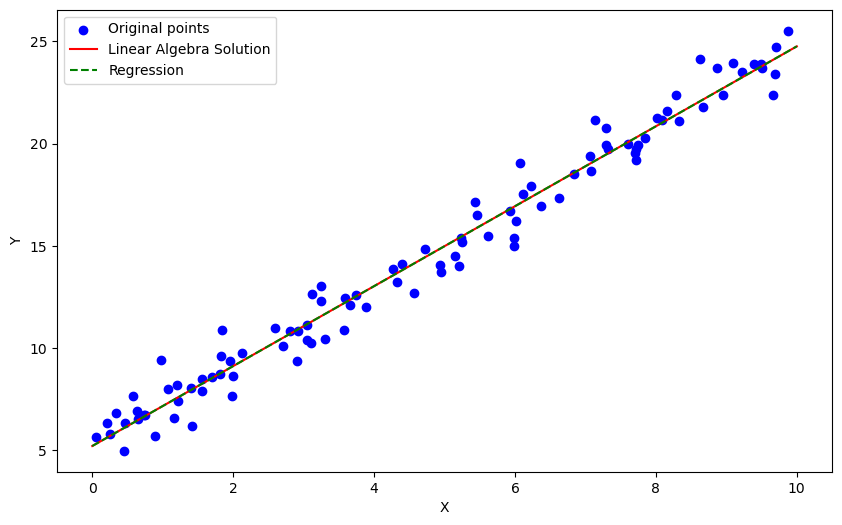

In [4]:
## 결과 시각화

plt.figure(figsize=(10,6))
plt.scatter(x,y , color='blue', label= 'Original points')
line_x = np.array([[0], [10]])
line_y_alg = theta_best[0] * line_x + theta_best[1]
line_y_reg = slope*line_x+intercept
plt.plot(line_x, line_y_alg, color='red', label='Linear Algebra Solution')
plt.plot(line_x, line_y_reg, color='green',linestyle='--', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
## 비선형 데이터들

# 데이터셋 생성
np.random.seed(0)
x =np.linspace(-10,10,100)
y = 1.5* x **2 -2.5 * x +0.5 + np.random.normal(0,20, size=x.shape)

/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.

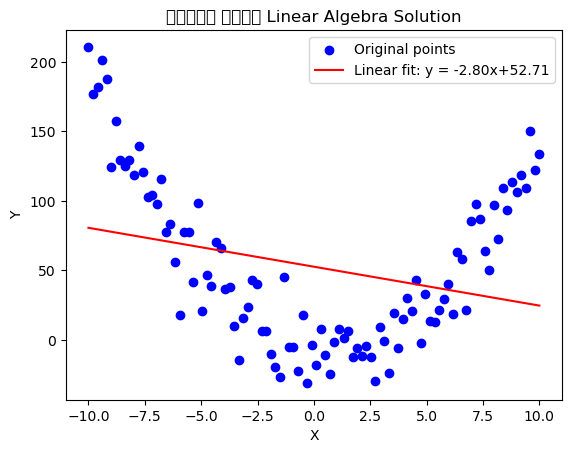

In [6]:
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A,y, rcond=None)[0]

plt.scatter(x,y , color='blue', label= 'Original points')
plt.plot(x, m*x + c,'r',label=f'Linear fit: y = {m:.2f}x+{c:.2f}')
plt.title('비선형적인 데이터를 Linear Algebra Solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


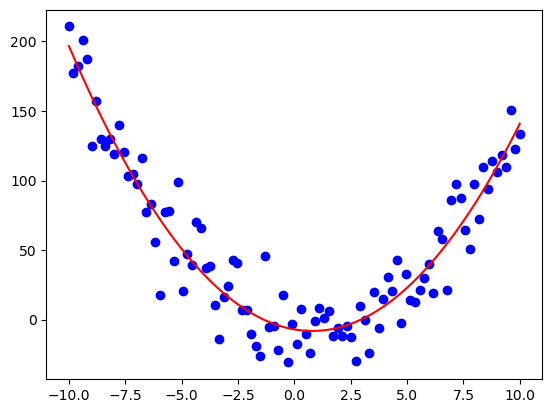

In [7]:
##다항회귀 
##차수 높이는 것 -> 비선형적인 것들은 더 학습을 잘 시킬 수 있게 진행하는 것

#넘파이를 가지고 2차 회귀식을 그려보자!
coeff = np.polyfit(x,y,2)
poly_eqn = np.poly1d(coeff)

plt.scatter(x,y , color='blue', label= 'Original points')
plt.plot(x, poly_eqn(x),'r',label=f'Non- Linear fit: y = {coeff[0]:.2f}x2+{coeff[1]:.2f}x+{coeff[2]:.2f}')

## 선형회귀의 가정들
- 잔차 가정들
- 잔차플롯을 통해 
- 정규성 shapiro-Wilk Test
- 더빈-왓슨 테스트
- 잔차의 선형성 및 독립성 검정
- 정규성 검정에서 Q-Q 플롯
- 등분산성의 검정 플롯
- 시각화, test 통계치로 확인을 하자!

In [8]:
#데이터셋 생성
import statsmodels.api as sm

#정규분포를 가정하여 데이터셋을 만듦
np.random.seed(0)
x = np.random.normal(0,1,100)
y = 2+2*x+np.random.normal(0,2,100)

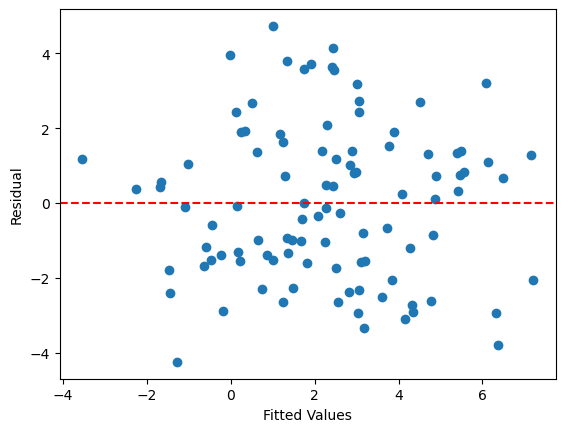

Shapiro-Wilk Test: Statistics=0.979, p=0.114
Durbin-Watson Statistics 1.994830282178435


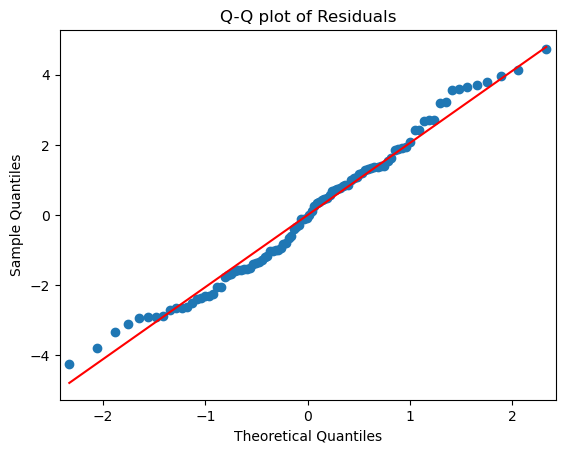

Text(0.5, 1.0, 'Residual plot with Lowess Line')

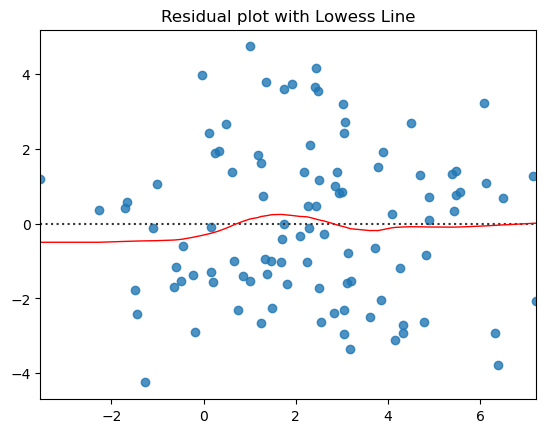

In [9]:
# 해당 데이터셋들의 가정들을 비교하자!

#선형회귀 모델 적합
model = sm.OLS(y, sm.add_constant(x)).fit()

#잔차의 플롯
residuals = model.resid # 잔차를 뽑아서
fitted = model.fittedvalues

## 1번 
# scatter로 그래프 확인
plt.scatter(fitted, residuals) # 잔차 그래프
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.axhline(0, color= 'red', linestyle='--')
plt.show()

# 2번 정규성 검정 : shapiro - Wilk 테스트
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

# 3번 더빈 왓슨 테스트
dw_stat = durbin_watson(residuals)
print('Durbin-Watson Statistics', dw_stat)

# 4번 정규성 검정 Q-Q플롯
fig =sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of Residuals')
plt.show()

# 5번 등분산성 검정 :잔차의 분산 플롯

sns.residplot(x=fitted, y = residuals, lowess= True , line_kws = {'color':'red', 'lw':1})
plt.title('Residual plot with Lowess Line')

- 위의 그래프와 값들에 대한 해석

- 잔차의 선형성, 독립성들 

### 1번에 대한 해석
- 데이터 포인트 무작위로 분포가 되어야 한다. 
- 곡선적 패턴 보이지 않아야 한다. 잔차가 0 균일하게 분포가 되어야 한다. 모든 예측값에 대한 잔차는 동일하게 분포가 되어야 하고, 잔차 예측값이 무관함이 독립성을 가정

### 2번에 대한 해석
- shapiro-wilk 테스트 p값
- 0.05 이상이면 잔차가 정규분포를 따른다고 볼 수 있다. 이는 잔차가 정규성을 만족한다는 것

### 3번에 대한 해석
- 더빗-왓슨통계량 : 통계량 값이 2에 가까우면 잔차들 사이에서 자기 상관성이 없다고 본다. 0에 가까우면 양의 자기상관, 4에 가까우면 음의 자기상관
- 2를 크게 벗어나는 값들 주의해야 한다.

### 4번에 대한 해석
- Q-Q 플롯 : 데이터 포인트들이 대각선 라인(빨간 선, 기대되는 정규분포 라인) 배열 잘 붙어야 된다. 이 라인에서 크게 벗어나는 포인트들은 잔차의 분포가 정규분포를 따르지 않음을 나타내는 것, 데이터의 분포 벗어나고 난리나는 경우가 있다. 곡선으로 되어 있고, 극단값이나 왜곡이 되어있을 수 있다고 보는 것

### 5번에 대한 해석
- 등분산성 검정 (Residual Plot) : 잔차플롯에서 Lowess 수평선 형성, 수평선을 형성하면서 잔차의 예측값에 대해서 일정다하는 것을 의미하는 것
- 잔차의 분포가 예측값에 따라 변하거나, 경향이 보이거나 하면 등분산성에 대한 가정이 위반이 되었다고 보는 것

### 실제 캘리포니아 집값 데이터로 같이 비교해 보자!

In [10]:
# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# 필요한 컬럼 선택
x = data['MedInc']
y = data['MedHouseVal']

# 상수항 추가
x = sm.add_constant(x)

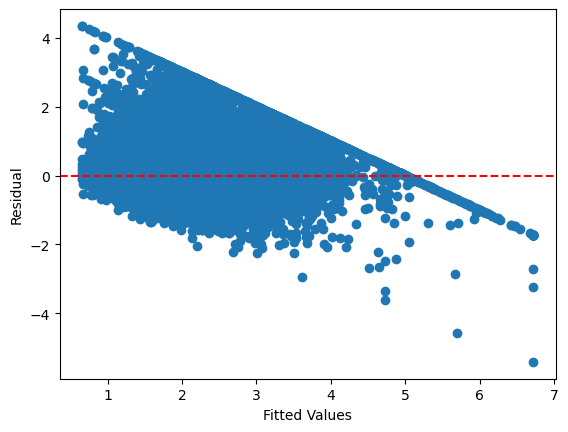

Shapiro-Wilk Test: Statistics=0.922, p=0.000
Durbin-Watson Statistics 0.6545256909553094


/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


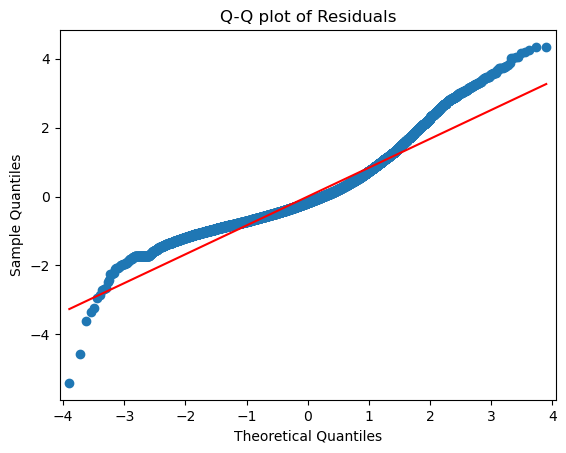

Text(0.5, 1.0, 'Residual plot with Lowess Line')

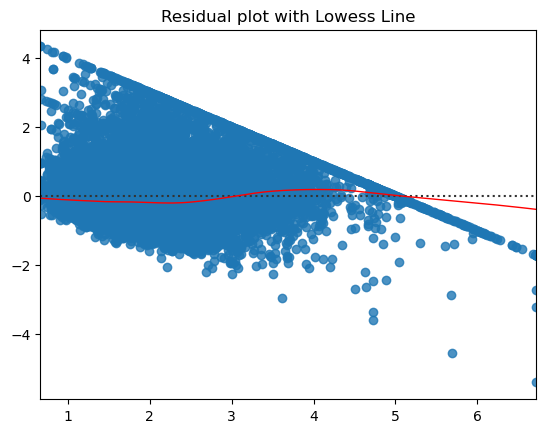

In [11]:
#선형회귀 모델 적합
model = sm.OLS(y, sm.add_constant(x)).fit()

#잔차의 플롯
residuals = model.resid # 잔차를 뽑아서
fitted = model.fittedvalues

## 1번 
# scatter로 그래프 확인
plt.scatter(fitted, residuals) # 잔차 그래프
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.axhline(0, color= 'red', linestyle='--')
plt.show()

# 2번 정규성 검정 : shapiro - Wilk 테스트
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

# 3번 더빈 왓슨 테스트
dw_stat = durbin_watson(residuals)
print('Durbin-Watson Statistics', dw_stat)

# 4번 정규성 검정 Q-Q플롯
fig =sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of Residuals')
plt.show()

# 5번 등분산성 검정 :잔차의 분산 플롯

sns.residplot(x=fitted, y = residuals, lowess= True , line_kws = {'color':'red', 'lw':1})
plt.title('Residual plot with Lowess Line')

### 이상치를 제거하면서 캘리포니아 주택 가격을 예측하자!

Text(0.5, 1.0, 'Outlier Removal')

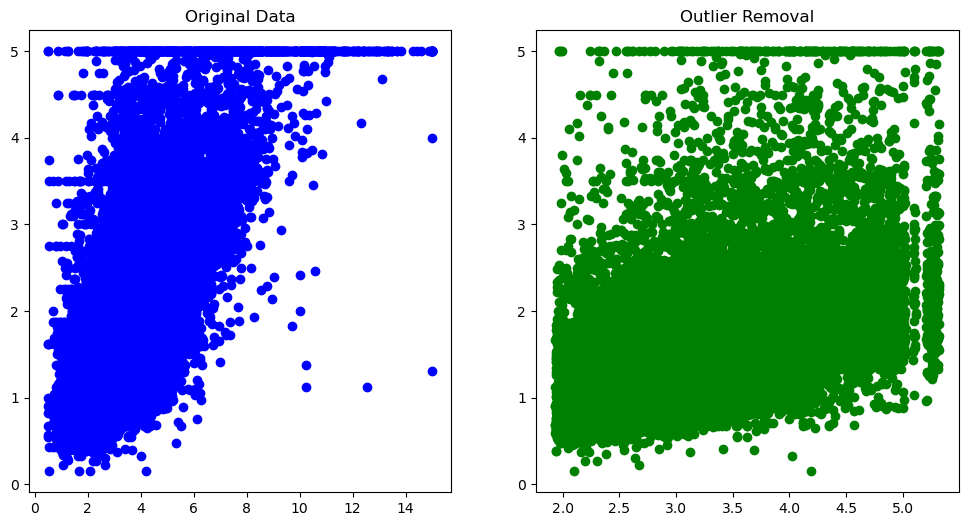

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# 필요한 컬럼 선택
x = data['MedInc'] #중앙값 수입
y = data['MedHouseVal'] #중앙값 집값

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size = 0.2, random_state=111)

# 이상치를 제거하자!
# Isolation Forest 
iso = IsolationForest(contamination = 0.3)
yhat = iso.fit_predict(np.array(X_train).reshape(-1,1))

# 이상치 제거 전 후 그래프 비교

mask = yhat != -1
X_train_filtered, y_train_filtered = X_train[mask], y_train[mask]

# 시각화를 통해 이상치 제거 전 후 

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, c='blue', label='Original')
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_train_filtered, y_train_filtered, c='green', label='Filtered')
plt.title('Outlier Removal')

In [13]:
##  원본 데이터 학습
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred = model.predict(np.array(X_test).reshape(-1,1))
mse_original = mean_squared_error(y_test, y_pred)

# 이상치제거는

model_filtered = LinearRegression()
model_filtered.fit(np.array(X_train_filtered).reshape(-1,1), y_train_filtered)
y_pred_filtered = model_filtered.predict(np.array(X_test).reshape(-1,1))
mse_filtered = mean_squared_error(y_test, y_pred_filtered)


print('Original MSE:', mse_original)
print('Filtered MSE:', mse_filtered)

#실제 결과로는 원본데이터 더 낮게 나왔다. 
#Outlier를 제거한 것이 조금 더 높게 나왔다. 

Original MSE: 0.7282634839897112
Filtered MSE: 0.7305928153635892
